# Visualize Calibration Metrics

In [293]:
import blackhc.project.script

In [294]:
import pandas as pd

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# MatPlotLib style and settings (that also affect PlotNine)

rc("text", usetex=False)
rc(
    "text.latex",
    preamble=r"""
\usepackage{bbm}
\usepackage{amsmath}
\usepackage{amsfonts}
""",
)

In [296]:
!ls results/*.csv

results/cifar10_test_mean_disrate.csv
results/cifar10_test_mean_infogain.csv
results/cifar10_test_top_disrate.csv
results/cifar10_test_top_infogain.csv
results/cinic10_test_mean_disrate.csv
results/cinic10_test_mean_infogain.csv
results/cinic10_test_top_disrate.csv
results/cinic10_test_top_infogain.csv
results/imagenet_mean_disrate.csv
results/imagenet_mean_infogain.csv
results/imagenet_top_disrate.csv
results/imagenet_top_infogain.csv
results/pacs_cartoon_sketch_beit_large_patch16_224_mean_disrate.csv
results/pacs_cartoon_sketch_beit_large_patch16_224_mean_infogain.csv
results/pacs_cartoon_sketch_beit_large_patch16_224_top_disrate.csv
results/pacs_cartoon_sketch_beit_large_patch16_224_top_infogain.csv
results/pacs_cartoon_sketch_mean_disrate.csv
results/pacs_cartoon_sketch_mean_infogain.csv
results/pacs_cartoon_sketch_resnet152d_mean_disrate.csv
results/pacs_cartoon_sketch_resnet152d_mean_infogain.csv
results/pacs_cartoon_sketch_resnet152d_top_disrate.csv
results/pacs_cartoon_sketch_r

# Load Data

In [297]:
# dataset = "cifar10_test"
# dataset = "cinic10_test"
# dataset="pacs_cartoon_sketch"
# dataset="pacs_cartoon_sketch_resnet152d"
# dataset="pacs_cartoon_sketch_beit_large_patch16_224"
# dataset="pacs_cartoon_sketch_vit_base_patch16_384"
#rejection_score = "disrate"
rejection_score = "infogain"

In [298]:
df_top = pd.read_csv(f"results/{dataset}_top_{rejection_score}.csv")

In [299]:
df_top

,num_elements,mean_rejection_score,max_rejection_score,ece,cace,mece,calibration,error,predicted_error,top1_calibration,top1_error,top1_predicted_error
0,76,-1.348784e-08,-1.989520e-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3830,5.413014e-03,4.434544e-02,0.071227,0.142454,0.142454,0.071144,0.071227,0.000084,0.071227,0.071279,0.000052
2,4378,1.297287e-02,8.876717e-02,0.110553,0.222019,0.223572,0.109502,0.113339,0.003837,0.110553,0.113294,0.002741
3,4972,2.481169e-02,1.332745e-01,0.155109,0.313113,0.316895,0.151014,0.167377,0.016364,0.155109,0.166734,0.011625
4,5688,4.129215e-02,1.777334e-01,0.189030,0.387693,0.403094,0.179719,0.228059,0.048340,0.188959,0.223629,0.034669
5,6477,6.070544e-02,2.222058e-01,0.213154,0.451444,0.471453,0.196647,0.284885,0.088238,0.213154,0.277598,0.064443
6,7144,7.771169e-02,2.664399e-01,0.226484,0.499720,0.523460,0.204742,0.326792,0.122049,0.226484,0.317329,0.090845
7,7627,9.100178e-02,3.111059e-01,0.231651,0.524190,0.548945,0.207311,0.352773,0.145462,0.231651,0.341288,0.109637
8,7919,9.986976e-02,3.555475e-01,0.234373,0.539210,0.564718,0.208643,0.368279,0.159636,0.234373,0.355727,0.121354
9,8321,1.153719e-01,7.207712e-01,0.234395,0.548251,0.577911,0.206797,0.387429,0.180632,0.234395,0.373994,0.139599


In [300]:
df_mean = pd.read_csv(f"results/{dataset}_mean_{rejection_score}.csv")

In [301]:
df_mean

,num_elements,mean_rejection_score,max_rejection_score,ece,cace,mece,calibration,error,predicted_error,top1_calibration,top1_error,top1_predicted_error
0,3830,0.005413,0.044345,0.060011,0.120159,0.124904,0.056897,0.079154,0.022257,0.059386,0.071279,0.011893
1,4378,0.012973,0.088767,0.082081,0.166201,0.179812,0.074189,0.127266,0.053078,0.082081,0.113065,0.030984
2,4972,0.024812,0.133274,0.106892,0.216440,0.240801,0.089983,0.185174,0.095191,0.106892,0.166331,0.059440
3,5688,0.041292,0.177733,0.125275,0.261338,0.302267,0.099806,0.247377,0.147571,0.125275,0.223629,0.098354
4,6477,0.060705,0.222206,0.137386,0.298578,0.350539,0.105389,0.304833,0.199444,0.137386,0.276517,0.139131
5,7144,0.077712,0.266440,0.145224,0.325455,0.385479,0.107855,0.346288,0.238433,0.145213,0.316489,0.171277
6,7627,0.091002,0.311106,0.146670,0.336237,0.403097,0.107989,0.371923,0.263934,0.146548,0.339190,0.192642
7,7919,0.099870,0.355548,0.147771,0.346668,0.416772,0.108499,0.387129,0.278629,0.147771,0.353075,0.205304
8,8321,0.115372,0.720771,0.147828,0.350721,0.429111,0.107183,0.406125,0.298942,0.147481,0.371109,0.223628


# Plot Data

In [302]:
plt.style.use("seaborn-colorblind")
sns.color_palette("colorblind")
sns.set_style("whitegrid")
sns.color_palette()

/tmp/ipykernel_94273/2016484528.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [303]:
def plt_save(grd, output_path, **kwargs):
    # plt.style.use("seaborn-colorblind")
    grd.savefig(output_path, transparent=True, bbox_inches="tight", pad_inches=0, **kwargs)

In [304]:
df_mean_copy = df_mean.copy()
df_mean_copy["type"] = "Normal"
df_top_copy = df_top.copy()
df_top_copy["type"] = "TOP"
df_merged = pd.concat([df_top_copy, df_mean_copy])
df_merged

,num_elements,mean_rejection_score,max_rejection_score,ece,cace,mece,calibration,error,predicted_error,top1_calibration,top1_error,top1_predicted_error,type
0,76,-1.348784e-08,-1.989520e-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TOP
1,3830,5.413014e-03,4.434544e-02,0.071227,0.142454,0.142454,0.071144,0.071227,0.000084,0.071227,0.071279,0.000052,TOP
2,4378,1.297287e-02,8.876717e-02,0.110553,0.222019,0.223572,0.109502,0.113339,0.003837,0.110553,0.113294,0.002741,TOP
3,4972,2.481169e-02,1.332745e-01,0.155109,0.313113,0.316895,0.151014,0.167377,0.016364,0.155109,0.166734,0.011625,TOP
4,5688,4.129215e-02,1.777334e-01,0.189030,0.387693,0.403094,0.179719,0.228059,0.048340,0.188959,0.223629,0.034669,TOP
5,6477,6.070544e-02,2.222058e-01,0.213154,0.451444,0.471453,0.196647,0.284885,0.088238,0.213154,0.277598,0.064443,TOP
6,7144,7.771169e-02,2.664399e-01,0.226484,0.499720,0.523460,0.204742,0.326792,0.122049,0.226484,0.317329,0.090845,TOP
7,7627,9.100178e-02,3.111059e-01,0.231651,0.524190,0.548945,0.207311,0.352773,0.145462,0.231651,0.341288,0.109637,TOP
8,7919,9.986976e-02,3.555475e-01,0.234373,0.539210,0.564718,0.208643,0.368279,0.159636,0.234373,0.355727,0.121354,TOP
9,8321,1.153719e-01,7.207712e-01,0.234395,0.548251,0.577911,0.206797,0.387429,0.180632,0.234395,0.373994,0.139599,TOP


In [305]:
df_merged = df_merged[
    [
        "num_elements",
        "mean_rejection_score",
        "max_rejection_score",
        "ece",
        "mece",
        "cace",
        "calibration",
        "error",
        "predicted_error",
        "type",
    ]
]

In [306]:
def plot_rejection_plot_calibration_measure_inequalities(df):
    df = df.copy()
    df["fraction_elements"] = df["num_elements"] / df["num_elements"].max()

    rejection_score_axis = "max_rejection_score"
    df = df[[rejection_score_axis, "mece", "cace", "error", "ece", "calibration", "type"]]
    dfm = pd.melt(df, id_vars=["type", rejection_score_axis])

    nice_variable_names = {
        "error": "Test Error",
        "calibration": "| Test Error - Predicted Error |",
        "ece": "ECE",
        "mece": "CWCE",
        "cace": "CACE",
        "fraction_elements": "% Samples",
        "predicted_error": "Disagreement Rate",
    }

    def to_nice_variable_names(n):
        return nice_variable_names[n]

    dfm["Measure"] = dfm.variable.map(to_nice_variable_names)
    dfm["Ensemble Type"] = dfm.type

    g = sns.relplot(
        data=dfm,
        x=rejection_score_axis,
        y="value",
        hue="Measure",
        col="Ensemble Type",
        marker="o",
        kind="line",
        aspect=1,
        facet_kws=dict(sharey=True, sharex=False),
    )

    if rejection_score == "disrate":
        g.set_axis_labels("Predicted Error (Disagreement Rate)", "Value")
    else:
        g.set_axis_labels("Expected Information Gain/BALD (Bayesian Disagreement)", "Value")
    # g.set_titles(col_template="Ensemble Type: {col_name}", row_template="{row_name}")
    g.set_titles(template="")
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)
    # First TOP then Normal
    return g

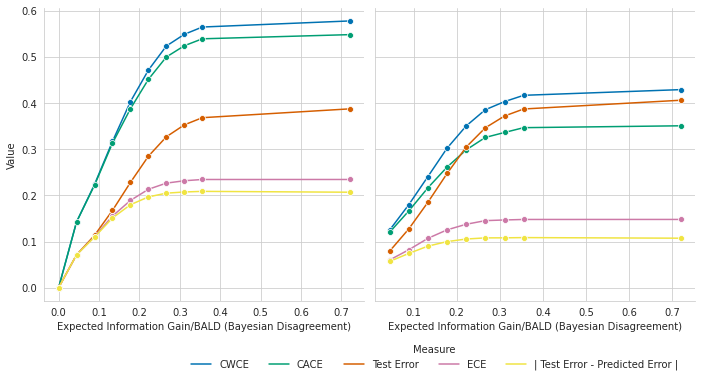

In [307]:
g = plot_rejection_plot_calibration_measure_inequalities(df_merged)
plt_save(g, f"{dataset}_rejection_plot_{rejection_score}.pdf")